# Linear Least Square Fitting

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook 

Declaring variables

In [2]:
# xpoints = np.random.rand(10)
# ypoints = np.random.rand(10)

# xpoints = np.random.randint(-10,40,50)
# ypoints = np.random.randint(-10,40,50)

# xpoints = np.array([-11,-7,-4,-2, 2,5,7,8])
# ypoints = np.array([4,3,-4,5,5,4,3,-1])

# #points for cubic fit
# xpoints = np.array([3,-2,-1,0,1,2,2.5, 3]) 
# ypoints = np.array([-24,-5,2,3,4,11,20,30])

xmatrix= [] #linear
xmatrix_quad = [] #quadratic
xmatrix_cub = [] #cubic
ymatrix = []
total = np.sum(xpoints)
avg_x = total / xpoints.size
sigma_sq = []

# Determining x matrices and y vector

Here, I am taking the x and y points and adding them to their respective matrices. Note that the 'xmatrix' is equivalent to the A matrix in Adrian's notes. For a linear or quadratic x matrix:

$$X_{linear} = \begin{bmatrix}
1 & x_{1} \\
1 & x_{2} \\
\vdots & \vdots \\
\end{bmatrix}, \quad
X_{quadratic} = \begin{bmatrix}
1 & x_{1} & x_{1}^{2}\\
1 & x_{2} & x_{2}^{2} \\
\vdots & \vdots & \vdots\\
\end{bmatrix}
$$
While the y vector is just the y points:
$$\bar{y} = \begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
\end{bmatrix}
$$

In [3]:
for n in np.arange(xpoints.size):
    xmatrix.append([1.0,xpoints[n]]) #adding x points to x matrix for linear
    
for n in np.arange(xpoints.size):
    xmatrix_quad.append([1.0,xpoints[n],xpoints[n]**2]) #adding x points to x matrix for quadratic 
    
for n in np.arange(xpoints.size):
    xmatrix_cub.append([1.0,xpoints[n],xpoints[n]**2,xpoints[n]**3]) #adding x points to x matrix for cubic 
    
#changing to nparray
xmatrix = np.array(xmatrix) 
xmatrix_quad = np.array(xmatrix_quad) 
xmatrix_cub = np.array(xmatrix_cub)

# Noise covariance matrix

This method is based on Adrian's notes to determing the $\hat{x}$ for $y^{model} = A\hat{x}$. From his notes, $\hat{x}$ is defined as $\hat{x} = [A^TN^{-1}A]^{-1}A^TN^{-1}\bar{y}$.

From the earlier code, I already found $A$ = xmatrix and $\bar{y}$. To find $N$, I first need to find the variance or $\sigma^{2}$. The $N$ matrix is as follows:
$$ N = \begin{pmatrix}
\sigma_{1}^{2} & 0 & 0 &\ldots{} \\
0 & \sigma_{2}^{2} & 0 & \ldots{} \\
0 & 0 & \sigma_{3}^{2} & \ldots{} \\
\vdots & \vdots & \ddots \\
\end{pmatrix} $$
To find $\sigma^{2}$, I used the following formula:
$$\sigma^{2} = \frac{1}{N} \sum_{i}^{N}{(x_{i} - \mu)^{2}}$$
where $N$ is the number of terms and $\mu$ is the mean.

In [4]:
for n in np.arange(xpoints.size):
        sigma_sq.append(((xpoints[n] - avg_x)**2)/(xpoints.size))

# print(np.identity(8))

# sigma_sq = np.identity(8)
sigma_sq= np.array(sigma_sq) #sigma squared or variance
diag_sigma = np.diag(sigma_sq)
# np.identity(8)
# np.diag(sigma_sq) #matrix N

Since I have determined the values ($A, N, \bar{y}$) to find $\hat{x}$, it's just a matter of multiplying everything for $\hat{x} = [A^TN^{-1}A]^{-1}A^TN^{-1}\bar{y}$. I broke down the steps of the process:
<ol>
<li>$A^TN^{-1}$</li>
<li>$A^TN^{-1}\bar{y}$</li>
<li>$[A^TN^{-1}A]^{-1}$</li>
<li>$\hat{x} = [A^TN^{-1}A]^{-1}A^TN^{-1}\bar{y}$</li>
<li>$y^{model} = A\hat{x}$</li>
</ol>	


In [5]:
def variance(m, label_string):
    dot_matrix = np.dot(m.T,np.linalg.inv(diag_sigma)) #Step 1
    doty_matrix = np.dot(dot_matrix,ypoints) #Step 2
    inv_matrix = np.linalg.inv(np.dot(dot_matrix,m)) #Step 3
    x_bar = np.dot(inv_matrix, doty_matrix) #Step 4
    y_model = np.dot(m, x_bar) #Step 5
    return plt.plot(xpoints, y_model, label = label_string + " (Adrian's notes)") #plotting graph

# Coefficients

This method is based on my linear algebra textbook. You essentially find the coefficients for either the linear or quadratic equation. For a linear equation. $\bar{y} = X\bar{\beta}$ where $\bar{\beta} = \begin{bmatrix}
\beta_{0} \\
\beta_{1} \\
\end{bmatrix}$ or  $y = \beta_{0} + \beta_{1}x$. 

For quadratic,  $\bar{y} = X\bar{\beta} + \bar{\epsilon}$ or $y_{n} = \beta_{0} + \beta_{1}x_{n} + \beta_{2}x^{2}_{n} + \epsilon_{n}$ where $\bar{\epsilon}$ is residual vector which is the difference between the observed y and predicted y.


To find $\bar{\beta}$, use the normal equation of $X\bar{\beta} = \bar{y}$ which is $X^{T}X\bar{\beta} = X^T\bar{y}$. I broke down the process as follows:
<ol>
    <li>$X^{T}X$</li>
    <li>$X^T\bar{y}$</li>
    <li>$\bar{\beta} = [X^{T}X]^{-1}X^T\bar{y}$</li>
</ol>

In [6]:
xtmatrix = np.dot(xmatrix.T,xmatrix) #Step 1
xtmatrix_quad = np.dot(xmatrix_quad.T,xmatrix_quad) #quadratic version of Step 1

ytmatrix = np.dot(xmatrix.T, ypoints) #Step 2
ytmatrix_quad = np.dot(xmatrix_quad.T, ypoints) #quadratic version of Step 2

coeff = np.dot(np.linalg.inv(xtmatrix), ytmatrix) #Step 3
coeff_quad = np.dot(np.linalg.inv(xtmatrix_quad), ytmatrix_quad) #quadratic version of Step 3

print(coeff_quad)

[ 2.46087542e+00 -3.86239030e-02 -2.30196127e-03]


Using the coefficients found earlier, substitute it into the respective equations: $\bar{y} = X\bar{\beta}$ or $\bar{y} = X\bar{\beta} + \bar{\epsilon}$. Then, plot the graphs.

In [7]:
def linear(arr, x):
    b = arr[0]
    m = arr[1]
    y = m*x + b
    p1 = plt.plot(x, y, label = "linear (textbook)")
    print('Textbook linear equation: y =',m,'x +',b)
    return p1
    
# def residual(arr,x): #determining residual vector
#     res = []
#     a = arr[0]
#     b = arr[1]
#     c = arr[2]
#     y = a*(x**2) + b*x + c
#     for n in np.arange(ypoints.size):
#         res.append(ypoints[n] - y[n])
#     return res
    
def quad(arr, x, y):
    res = []
    a = arr[0]
    b = arr[1]
    c = arr[2]
    y = a*(x**2) + b*x + c 
    for n in np.arange(ypoints.size): 
        res.append(ypoints[n] - y[n]) #difference between observed y and predicted y
    y += res
    p2 = plt.plot(x,y, label = "quadratic (textbook)")
    print('Textbook quadratic equation: y =',a,'x^2 +',b,'x +', c)
    return p2

def quad2(arr, x, y):
    a = arr[0]
    b = arr[1]
    c = arr[2]
    y = a*(x**2) + (b*x) + c 
    p2 = plt.plot(x,y)
    return p2

# Calling Functions and Graphing

<IPython.core.display.Javascript object>


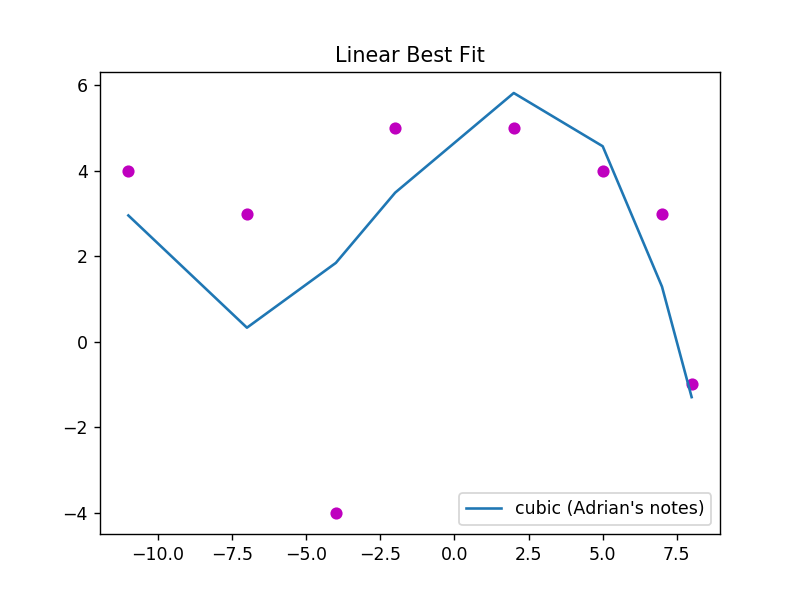

Text(0.5, 1.0, 'Linear Best Fit')

In [8]:
plt.scatter(xpoints,ypoints, color='m')
# variance(xmatrix, 'linear')
# variance(xmatrix_quad, 'quadratic')
variance(xmatrix_cub, 'cubic')

plt.legend(loc='lower right')
plt.title("Linear Best Fit")

# linear(coeff,xpoints)
# quad(coeff_quad, xpoints,ypoints)
# res = residual(coeff_quad,xpoints)
# quad2(coeff_quad, xpoints,ypoints )